In [514]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [515]:
df = pd.read_csv('WineQT.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [516]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [517]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [518]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [519]:
df = df.drop('Id', axis=1).drop_duplicates()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<Axes: >

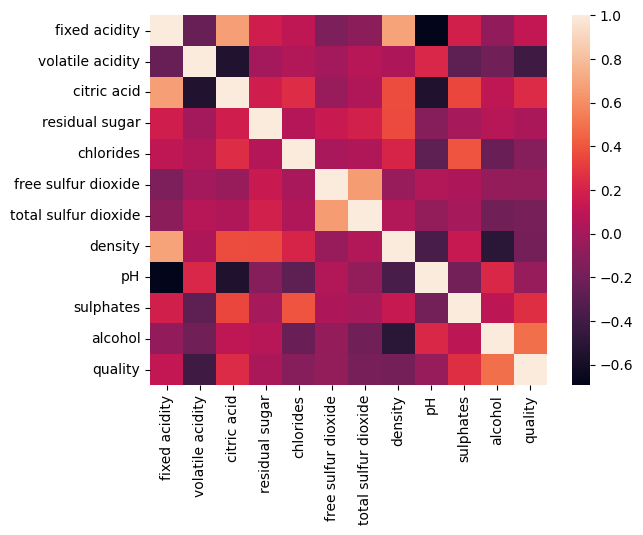

In [520]:
sns.heatmap(df.corr())

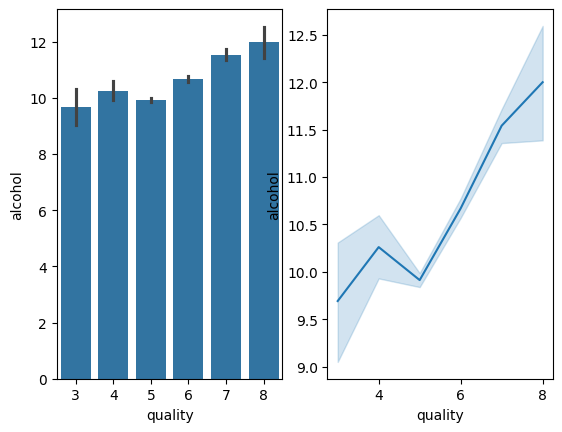

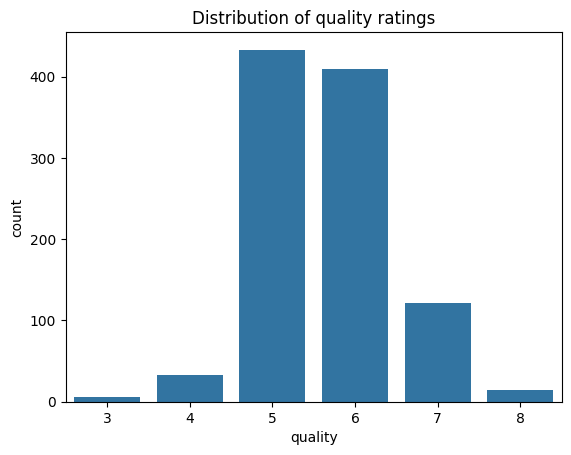

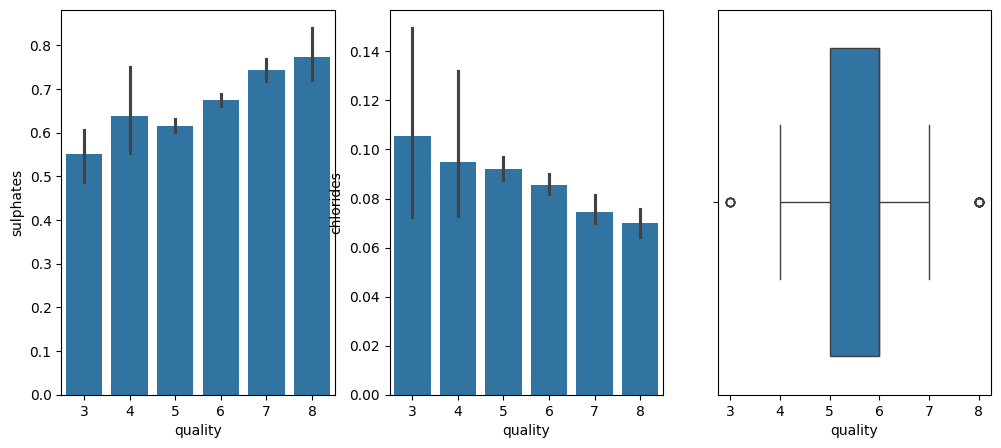

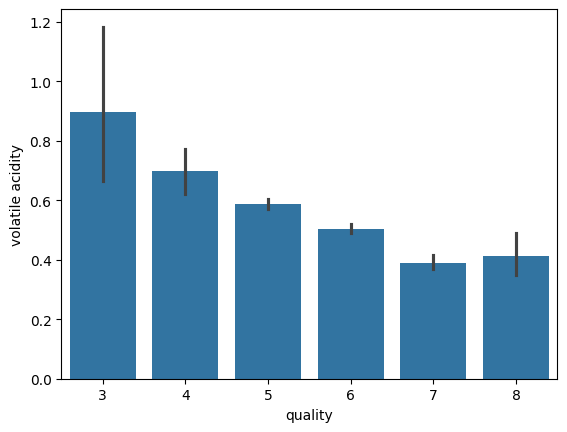

In [521]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
sns.barplot(df, x='quality', y='alcohol')

plt.subplot(1, 2, 2)
sns.lineplot(df, x='quality', y='alcohol')
plt.show()

sns.countplot(df, x='quality')
plt.title('Distribution of quality ratings')
plt.show()

plt.subplots(1, 3, figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(df, y='sulphates', x='quality')
plt.subplot(1, 3, 2)
sns.barplot(df, y='chlorides', x='quality')
plt.subplot(1, 3, 3)
sns.boxplot(df, x='quality')
plt.show()

sns.barplot(df, x='quality', y='volatile acidity')
plt.show()

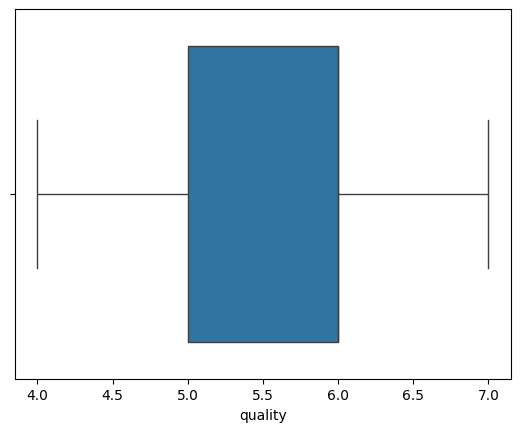

In [522]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df = df.loc[~((df['quality'] > upper['quality']) | (df['quality'] < lower['quality']))]

sns.boxplot(df, x='quality')
plt.show()

In [523]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

0.565


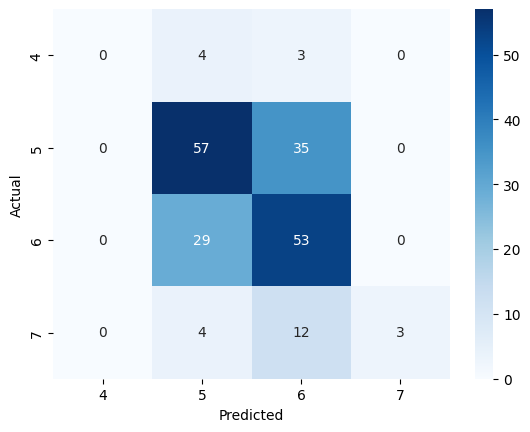

,precision,recall,f1-score,support
4,0.00,0.00,0.00,7.00
5,0.61,0.62,0.61,92.00
6,0.51,0.65,0.57,82.00
7,1.00,0.16,0.27,19.00
accuracy,0.56,0.56,0.56,0.56
macro avg,0.53,0.36,0.36,200.00
weighted avg,0.58,0.56,0.54,200.00


In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(23)

y_train = y_train.ravel()
y_test = y_test.ravel()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, predictions)
classification = classification_report(y_test, predictions, output_dict=True, zero_division=0)
confusion = confusion_matrix(y_test, predictions)

print(acc_score)

sns.heatmap(
  confusion,
  annot=True,
  fmt='d',
  xticklabels=model.classes_,
  yticklabels=model.classes_,
  cmap='Blues'
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

pd.DataFrame(classification).T.round(2)

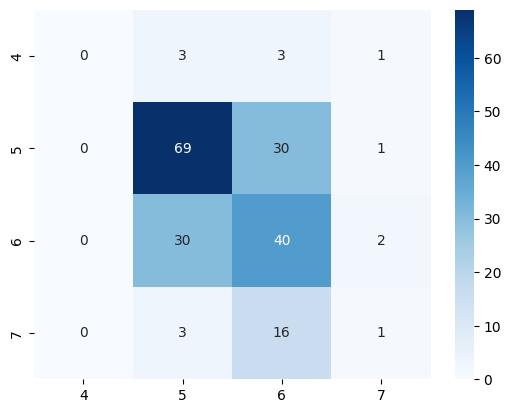

<Axes: >

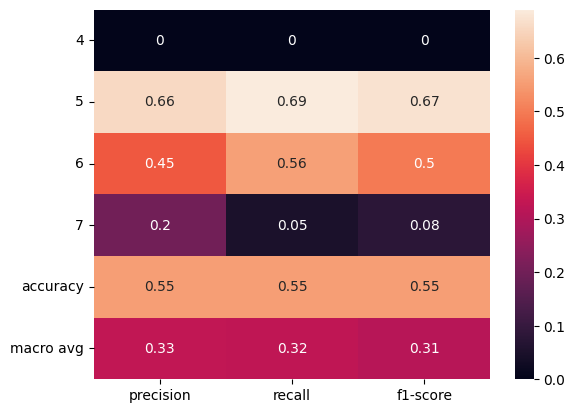

In [525]:
from typing import Tuple, List, Any, Optional

best_result: Optional[Tuple[float, List[Any], List[Any]]] = None

kfold = KFold(shuffle=True, random_state=727)

for i, (train_i, test_i) in enumerate(kfold.split(X)):
  knn = KNeighborsClassifier(n_neighbors=23)
  knn.fit(X[train_i], y[train_i].ravel())
  predictions = knn.predict(X[test_i])
  acc_score = accuracy_score(y[test_i], predictions)
  if not best_result or acc_score > best_result[0]:
    best_result = (acc_score, y[test_i], predictions)

best_acc, best_test, best_predict = best_result
best_acc

classification = classification_report(best_test, best_predict, output_dict=True, zero_division=0)
confusion = confusion_matrix(best_test, best_predict)

sns.heatmap(
  confusion,
  xticklabels=[4, 5, 6, 7],
  yticklabels=[4, 5, 6, 7],
  cmap="Blues",
  annot=True,
  fmt='d'
)
plt.show()

sns.heatmap(pd.DataFrame(classification).T.iloc[:-1, :-1], annot=True)